## 1. Statistical analysis

### 1.1 Historical Trend of Cost of Living Index by City



In [39]:
import pandas as pd
import matplotlib.pyplot as plt

<ipython-input-53-a93426078972>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



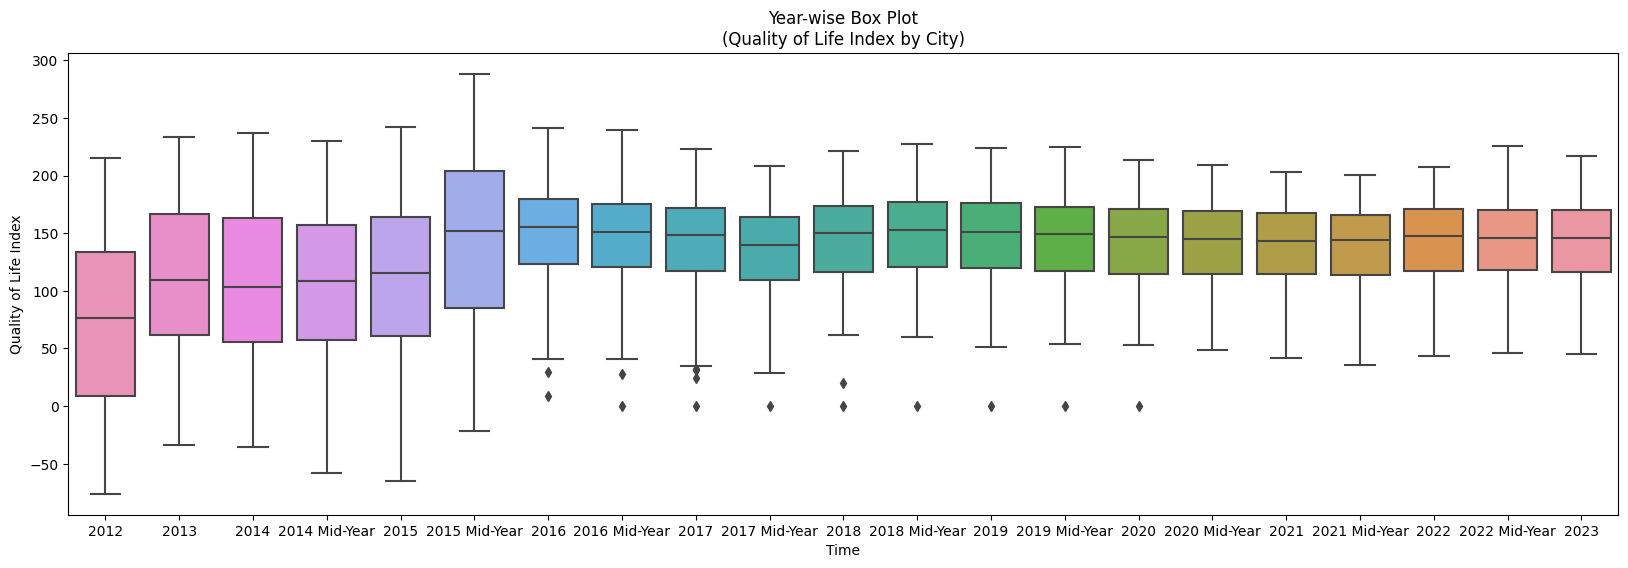

In [53]:
xls = pd.ExcelFile('Quality of Life by City.xlsx')

df = pd.DataFrame()
for i in range(len(xls.sheet_names)):
  sheet = xls.parse(i)
  sheet = sheet[['City', 'Quality of Life Index']]
  sheet['Time'] = xls.sheet_names[i]
  df = pd.concat([df, sheet], axis=0)

# Draw Plot
fig = plt.figure(figsize=(20,6))
sns.boxplot(x='Time', y='Quality of Life Index', data=df)

# Set Title
plt.title('Year-wise Box Plot\n(Quality of Life Index by City)', fontsize=12)
plt.gca().invert_xaxis()
plt.show()

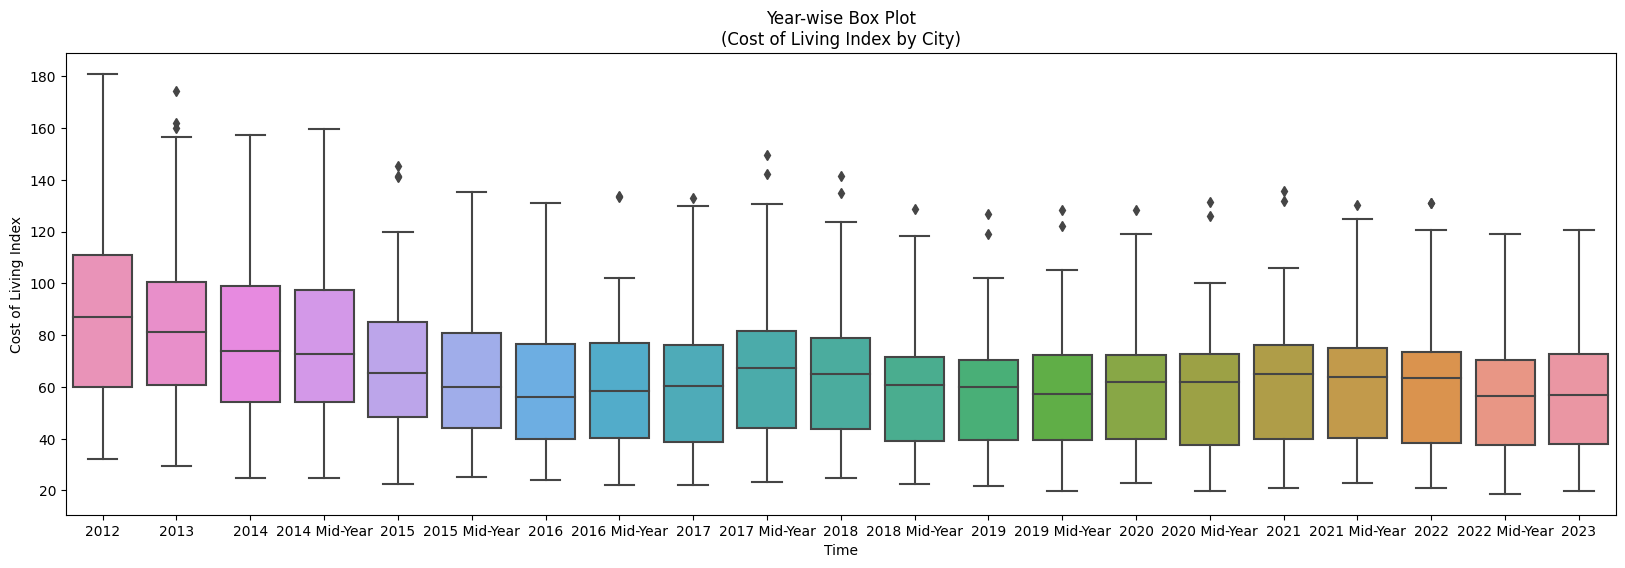

In [55]:
xls = pd.ExcelFile('Quality of Life by City.xlsx')

df = pd.DataFrame()
for i in range(len(xls.sheet_names)):
  sheet = xls.parse(i)
  sheet = sheet[['City', 'Cost of Living Index']]
  sheet['Time'] = xls.sheet_names[i]
  df = pd.concat([df, sheet], axis=0)

# Draw Plot
fig = plt.figure(figsize=(20,6))
sns.boxplot(x='Time', y='Cost of Living Index', data=df)

# Set Title
plt.title('Year-wise Box Plot\n(Cost of Living Index by City)', fontsize=12)
plt.gca().invert_xaxis()
plt.show()

### 1.2 PCA analysis

**Visualize all the original dimensions**

In [ ]:
import pandas as pd

In [30]:
xls = pd.ExcelFile('Quality of Life by City.xlsx')
sheet = xls.parse(0)
display(sheet)

,Rank,City,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,1,"The Hague (Den Haag), Netherlands",217.1,129.9,78.8,80.0,62.7,5.9,22.9,19.2,90.6
1,2,"Eindhoven, Netherlands",206.7,118.7,77.2,77.6,68.5,5.7,24.4,21.2,85.4
2,3,"Vienna, Austria",199.6,112.9,73.1,79.2,61.8,11.5,24.5,16.7,81.8
3,4,"Canberra, Australia",198.3,101.0,76.8,77.6,81.3,6.4,27.3,16.4,82.7
4,5,"Zurich, Switzerland",195.3,122.9,81.7,74.1,120.8,11.2,32.7,17.8,81.5
...,...,...,...,...,...,...,...,...,...,...,...
237,238,"Tehran, Iran",61.6,18.9,44.1,52.6,33.2,29.0,52.9,81.0,71.0
238,239,"Dhaka, Bangladesh",57.5,25.9,36.8,40.1,29.6,15.4,61.0,93.5,71.3
239,240,"Beirut, Lebanon",56.8,10.1,53.7,65.2,80.3,41.3,39.8,93.7,94.7
240,241,"Lagos, Nigeria",48.4,7.6,32.5,46.3,38.8,12.2,68.2,89.3,60.8


In [38]:
import plotly.express as px

df = sheet
df = df.drop('Rank', axis=1)
features = ["Quality of Life Index", "Purchasing Power Index", "Safety Index", "Health Care Index", 'Cost of Living Index', 'Property Price to Income Ratio', 'Traffic Commute Time Index', 'Pollution Index', 'Climate Index']

fig = px.scatter_matrix(
    df,
    dimensions=features,
    color="City"
)

fig.update_layout(
    autosize=False,
    width=2000,
    height=2000,
)

fig.update_traces(diagonal_visible=False)
fig.show()

## 2. Primary visuliazation of time-series data

In [8]:
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go

### 2.1 Quality of Life Index by City

In [23]:
xls = pd.ExcelFile('Quality of Life by City.xlsx')

df = pd.DataFrame()
for i in range(len(xls.sheet_names)):
  sheet = xls.parse(i)
  sheet = sheet[['City', 'Quality of Life Index']]
  sheet['Time'] = xls.sheet_names[i]
  df = pd.concat([df, sheet], axis=0)

<ipython-input-23-d678cc18d8c1>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
#extract color palette, the palette can be changed
list_city = list(set(df['City']))
pal = list(sns.color_palette(palette='mako', n_colors=len(list_city)).as_hex())

fig = go.Figure()
for d,p in zip(list_city, pal):
  fig.add_trace(go.Scatter(x = df[df['City'] == d]['Time'],
              y = df[df['City'] == d]['Quality of Life Index'],
              name = d,
              line_color = p, 
              fill=None))   #tozeroy 

fig['layout']['xaxis']['autorange'] = "reversed"
fig.show()

### 2.2 Cost of Living Index by City

In [25]:
xls = pd.ExcelFile('Cost of Living Index by City.xlsx')

df = pd.DataFrame()
for i in range(len(xls.sheet_names)):
  sheet = xls.parse(i)
  sheet = sheet[['City', 'Cost of Living Index']]
  sheet['Time'] = xls.sheet_names[i]
  df = pd.concat([df, sheet], axis=0)

<ipython-input-25-6861efe8c541>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
#extract color palette, the palette can be changed
list_city = list(set(df['City']))
pal = list(sns.color_palette(palette='mako', n_colors=len(list_city)).as_hex())

fig = go.Figure()
for d,p in zip(list_city, pal):
  fig.add_trace(go.Scatter(x = df[df['City'] == d]['Time'],
              y = df[df['City'] == d]['Cost of Living Index'],
              name = d,
              line_color = p, 
              fill=None))   #tozeroy 

fig['layout']['xaxis']['autorange'] = "reversed"
fig.show()